In [1]:
from train_test_split import train_val_test_split
from utils.utils import read_csv
from train_val import train_val
from test import test_model


import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable 
import matplotlib.pyplot as plt
import torch.optim.lr_scheduler as lr_scheduler
from unidecode import unidecode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pickle

In [2]:
main_path = "C:/Users/Miguel/OneDrive/Escritorio/2n curs/2n Semestre/Synthesis Project I/Project/work_project/data/generated_datasets" 
science_bio_path = main_path + "/science_and_bio.csv"
communication_path = main_path + "/communication.csv"
sabadell_path = main_path + "/sabadell.csv"
science_and_bio_target = 'Total (General) [kWh] [C-Ciencies]'
communication_target = 'I-Ciencies Comunicació (General) [kWh]'
sabadell_target = 'Sabadell (General) [kWh]'
targets = [science_and_bio_target, communication_target, sabadell_target]
paths = [science_bio_path, communication_path, sabadell_path]

In [3]:
# Read the genrated dataset by the script dataset_creation.py
science_bio_df = read_csv(science_bio_path)
for col in science_bio_df.columns:
    science_bio_df = science_bio_df.rename(columns={col: unidecode(col)})
    
science_bio_df

,Date,Hour,Total (General) [kWh] [C-Ciencies],Capacitat docencia,Superficie Centre Gestor,Metres,Datetime_hour,Weekday,Month,Hour_2,...,lagged_total_(general)_kwh_c-ciencies_720_mean,lagged_total_(general)_kwh_c-ciencies_168_std,lagged_total_(general)_kwh_c-ciencies_720_std,lagged_total_(general)_kwh_c-ciencies_168_min,lagged_total_(general)_kwh_c-ciencies_720_min,lagged_total_(general)_kwh_c-ciencies_168_max,lagged_total_(general)_kwh_c-ciencies_720_max,lagged_total_(general)_kwh_c-ciencies_last,lagged_superficie_centre_gestor_last,lagged_metres_last
0,2018-01-01,00:00,252.00,0.0,0.0,0.0,2018-01-01 00:00:00,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,01:00,253.87,0.0,0.0,0.0,2018-01-01 01:00:00,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,02:00,256.14,0.0,0.0,0.0,2018-01-01 02:00:00,1,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,03:00,257.73,0.0,0.0,0.0,2018-01-01 03:00:00,1,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,04:00,252.40,0.0,0.0,0.0,2018-01-01 04:00:00,1,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2022-12-31,19:00,212.00,0.0,0.0,0.0,2022-12-31 19:00:00,6,12,19,...,338.571972,20.118628,155.619664,194.0,194.0,308.0,810.0,208.0,0.0,0.0
43820,2022-12-31,20:00,210.00,0.0,0.0,0.0,2022-12-31 20:00:00,6,12,20,...,338.423319,19.702109,155.671322,194.0,194.0,308.0,810.0,208.0,0.0,0.0
43821,2022-12-31,21:00,208.00,0.0,0.0,0.0,2022-12-31 21:00:00,6,12,21,...,338.338944,19.660900,155.712977,194.0,194.0,308.0,810.0,210.0,0.0,0.0
43822,2022-12-31,22:00,206.00,0.0,0.0,0.0,2022-12-31 22:00:00,6,12,22,...,338.259319,19.673760,155.763645,194.0,194.0,308.0,810.0,204.0,0.0,0.0


In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = train_val_test_split(science_bio_df, science_and_bio_target)
X_train

c:\Users\Miguel\OneDrive\Escritorio\2n curs\2n Semestre\Synthesis Project I\Project\work_project\train_test_split.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])
c:\Users\Miguel\OneDrive\Escritorio\2n curs\2n Semestre\Synthesis Project I\Project\work_project\train_test_split.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['Date'].dt.year


,Capacitat docencia,Superficie Centre Gestor,Metres,Weekday,Month,Hour_2,Covid,lagged_total_(general)_kwh_c-ciencies_168_mean,lagged_total_(general)_kwh_c-ciencies_720_mean,lagged_total_(general)_kwh_c-ciencies_168_std,lagged_total_(general)_kwh_c-ciencies_720_std,lagged_total_(general)_kwh_c-ciencies_168_min,lagged_total_(general)_kwh_c-ciencies_720_min,lagged_total_(general)_kwh_c-ciencies_168_max,lagged_total_(general)_kwh_c-ciencies_720_max,lagged_total_(general)_kwh_c-ciencies_last,lagged_superficie_centre_gestor_last,lagged_metres_last
767,0.0,0.0,0.0,4,2,23,0.0,513.916488,473.160847,209.355557,213.530196,295.86,170.27,899.6,955.60,423.60,0.0,0.0
768,0.0,0.0,0.0,5,2,0,0.0,513.926786,473.265111,209.346269,213.440365,295.86,170.27,899.6,955.60,350.53,0.0,0.0
769,0.0,0.0,0.0,5,2,1,0.0,513.927560,473.337694,209.345496,213.374529,295.86,170.27,899.6,955.60,318.13,0.0,0.0
770,0.0,0.0,0.0,5,2,2,0.0,513.918036,473.418986,209.354578,213.302803,295.86,170.27,899.6,955.60,324.54,0.0,0.0
771,0.0,0.0,0.0,5,2,3,0.0,513.938690,473.539181,209.337566,213.205455,295.86,170.27,899.6,955.60,358.93,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26299,70.0,41.5,83.0,4,12,19,1.0,242.820119,339.353361,37.481647,147.567554,197.57,52.00,372.8,734.66,231.62,41.5,83.0
26300,70.0,41.5,83.0,4,12,20,1.0,242.517679,339.329403,37.411804,147.584600,197.57,52.00,372.8,734.66,246.23,41.5,83.0
26301,0.0,0.0,0.0,4,12,21,1.0,242.284405,339.303056,37.374125,147.602659,197.57,52.00,372.8,734.66,247.77,0.0,0.0
26302,0.0,0.0,0.0,4,12,22,1.0,242.215774,339.287597,37.396554,147.614131,197.57,52.00,372.8,734.66,233.10,0.0,0.0


In [5]:
# Standarise data
mm = MinMaxScaler()
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
y_train = mm.fit_transform(y_train)
X_val = ss.transform(X_val)
y_val = mm.transform(y_val)
X_test = ss.transform(X_test)
y_test = mm.transform(y_test)

In [6]:
# Set the device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
# Create a custom dataset
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        X = torch.tensor(X, dtype=torch.float32)
        y = torch.tensor(y, dtype=torch.float32)
        self.X = torch.reshape(X,   (X.shape[0], 1, X.shape[1]))
        self.y = y
    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [8]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, drop_out, output_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(
            input_size,
            hidden_size,
            num_layers,
            batch_first=True,
            dropout=drop_out
        )
        self.fc_1 = nn.Linear(hidden_size, hidden_size)
        self.dropout = nn.Dropout(0.3)
        self.fc_2 = nn.Linear(hidden_size, output_size)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        output, (hidden, cell) = self.lstm(x) 
        output = output[:, -1, :] 
        output = self.dropout(output)

        # pass output through the linear layer
        output = self.fc_1(output) 
        output = self.dropout(output)
        output = self.fc_2(output) 

        return output

In [65]:
# Hyperparameters
input_size = X_train.shape[1] # 18
hidden_size = 186
num_layers = 3
output_size = 1
num_epochs = 100
batch_size_train = 256
learning_rate = 0.001
batch_size_val_test = 256
drop_out=0.25

In [66]:
model = LSTMModel(
    input_size,
    hidden_size, 
    num_layers,
    drop_out, 
    output_size,
    ).to(device)
print(model)

LSTMModel(
  (lstm): LSTM(18, 186, num_layers=3, batch_first=True, dropout=0.25)
  (fc_1): Linear(in_features=186, out_features=186, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc_2): Linear(in_features=186, out_features=1, bias=True)
)


In [67]:
criterion = nn.MSELoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [68]:
# Create dataloaders for training, validation, and testing
train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset = TimeSeriesDataset(X_val, y_val)
test_dataset = TimeSeriesDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size_train, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size_val_test, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size_val_test, shuffle=False)

In [69]:
train_loss, val_loss, losses = train_val(num_epochs, train_loader, val_loader, model, criterion, optimizer, device)
print('Final Train Loss: {:.4f}, Final Validation Loss: {:.4f}'.format(train_loss, val_loss))

Epoch [1/100], Training Loss: 0.0190
Epoch [1/100], Validation Loss: 0.0084
Epoch [2/100], Training Loss: 0.0104
Epoch [2/100], Validation Loss: 0.0081
Epoch [3/100], Training Loss: 0.0069
Epoch [3/100], Validation Loss: 0.0060
Epoch [4/100], Training Loss: 0.0060
Epoch [4/100], Validation Loss: 0.0061
Epoch [5/100], Training Loss: 0.0057
Epoch [5/100], Validation Loss: 0.0054
Epoch [6/100], Training Loss: 0.0054
Epoch [6/100], Validation Loss: 0.0046
Epoch [7/100], Training Loss: 0.0052
Epoch [7/100], Validation Loss: 0.0043
Epoch [8/100], Training Loss: 0.0050
Epoch [8/100], Validation Loss: 0.0043
Epoch [9/100], Training Loss: 0.0051
Epoch [9/100], Validation Loss: 0.0042
Epoch [10/100], Training Loss: 0.0051
Epoch [10/100], Validation Loss: 0.0043
Epoch [11/100], Training Loss: 0.0049
Epoch [11/100], Validation Loss: 0.0045
Epoch [12/100], Training Loss: 0.0048
Epoch [12/100], Validation Loss: 0.0045
Epoch [13/100], Training Loss: 0.0047
Epoch [13/100], Validation Loss: 0.0045
Epoc

In [70]:

pickle.dump(model, open('model.pkl', 'wb'))

In [71]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

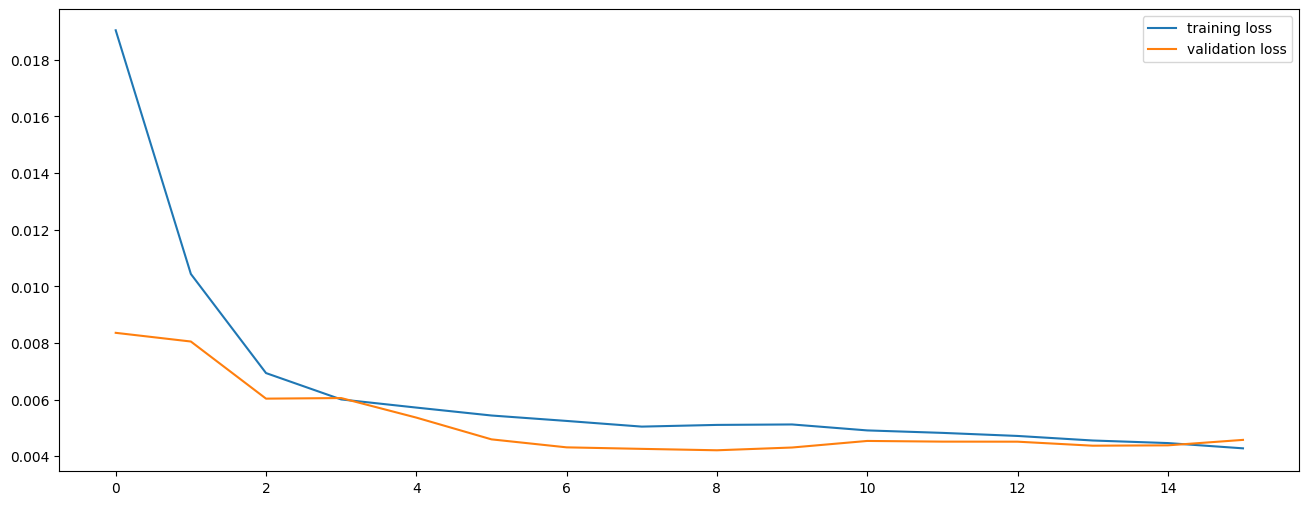

In [72]:
# plot the losses and accuracies
fig, (ax1) = plt.subplots(1, figsize=(16, 6))

ax1.plot(losses["train"], label="training loss")
ax1.plot(losses["val"], label="validation loss")
ax1.legend()

plt.show()


In [73]:
# Let's test the model 
# Loss with standarized data 
test_loss, predictions, targets = test_model(test_loader, pickled_model, criterion, device)

c:\Users\Miguel\anaconda3\envs\Pytorch_2\lib\site-packages\torch\nn\modules\rnn.py:812: UserWarning: RNN module weights are not part of single contiguous chunk of memory. This means they need to be compacted at every call, possibly greatly increasing memory usage. To compact weights again call flatten_parameters(). (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\cudnn\RNN.cpp:982.)
  result = _VF.lstm(input, hx, self._flat_weights, self.bias, self.num_layers,


Test Loss: 0.0037


In [74]:
from sklearn.metrics import mean_squared_error

# Let's also calculate the real test loss with descaled data
pred_descaled = mm.inverse_transform(predictions)
targets_descaled = mm.inverse_transform(targets)
mse_loss_descaled = mean_squared_error(targets_descaled, pred_descaled)
print(f'Descaled MSE Loss: {np.sqrt(mse_loss_descaled):.4f}')


Descaled MSE Loss: 80.1788


In [75]:
list_predictions = [pred[0] for pred in pred_descaled]
list_targets = [target[0] for target in targets_descaled]
print(list_predictions)
print(list_targets)

[186.32559, 186.43169, 197.03983, 196.49794, 202.50673, 203.9871, 205.9947, 209.54048, 211.62653, 210.30202, 210.79837, 208.01219, 211.87593, 207.89305, 196.7944, 196.6458, 194.59114, 197.88562, 193.76361, 194.88689, 188.89626, 186.28685, 183.77176, 180.2843, 176.28261, 182.77739, 184.40047, 187.22421, 190.711, 194.44563, 198.164, 199.23444, 198.45259, 195.08392, 197.72745, 196.11671, 193.97935, 193.50497, 192.83786, 192.2037, 188.70421, 189.38248, 190.30275, 188.77197, 184.58565, 181.949, 180.70584, 174.85687, 198.8277, 205.18575, 210.77034, 216.26549, 223.46631, 226.7322, 239.72975, 250.16765, 245.91852, 251.61841, 259.97852, 263.0157, 270.14417, 258.7613, 252.80515, 249.51085, 247.36862, 248.10939, 243.3344, 231.17763, 228.6943, 218.1925, 211.30376, 205.40298, 199.7189, 205.80211, 210.96321, 218.40958, 221.42612, 227.12042, 235.89114, 247.88046, 244.08234, 250.82031, 258.86105, 261.46393, 265.09067, 259.62112, 254.88458, 250.05266, 252.05902, 246.40384, 244.19041, 233.80975, 228.360

In [76]:
## Create dataframe with the predictions and the true values of the test data
test_pred_df = pd.DataFrame(
    {'Predictions': list_predictions,
     'Targets': list_targets,
    }
)

# Convert the index to datetime
date_range = pd.date_range(start='2022-01-01 00:00', periods=len(test_pred_df), freq='H')

# Assign the date range as the index of the dataframe
test_pred_df.index = date_range
test_pred_df

,Predictions,Targets
2022-01-01 00:00:00,186.325592,222.900009
2022-01-01 01:00:00,186.431686,230.360016
2022-01-01 02:00:00,197.039825,231.690002
2022-01-01 03:00:00,196.497940,229.649994
2022-01-01 04:00:00,202.506729,232.099991
...,...,...
2022-12-31 19:00:00,235.742264,212.000015
2022-12-31 20:00:00,231.930725,210.000000
2022-12-31 21:00:00,228.676865,208.000015
2022-12-31 22:00:00,222.508301,206.000000


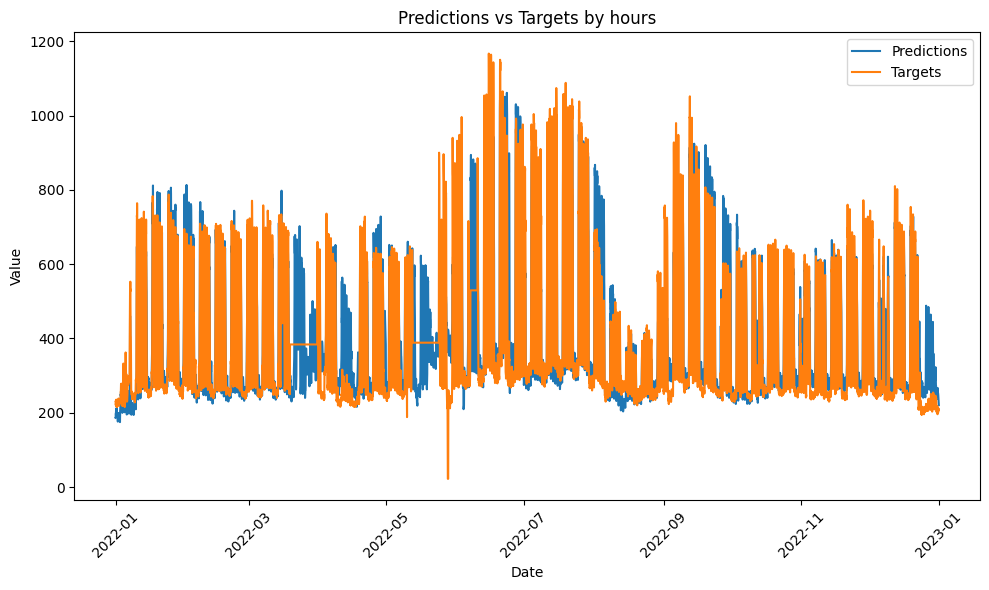

In [77]:

# Plotting the line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(test_pred_df.index, test_pred_df['Predictions'], label='Predictions')  
plt.plot(test_pred_df.index, test_pred_df['Targets'], label='Targets')  
plt.xlabel('Date')  
plt.ylabel('Value')  
plt.title('Predictions vs Targets by hours')  
plt.legend()  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

In [78]:
# Let's do a groupby per days to have the conssumption per days (now is done by hours)
df_daily_sum = test_pred_df.groupby(pd.Grouper(freq='D')).sum()
df_daily_sum

,Predictions,Targets
2022-01-01,4762.638672,5424.800293
2022-01-02,4552.405273,5479.760254
2022-01-03,5656.481445,6003.550293
2022-01-04,5654.471680,6005.900391
2022-01-05,5563.232910,6809.430176
...,...,...
2022-12-27,7587.180176,5290.120117
2022-12-28,7392.260742,5397.340332
2022-12-29,7362.270508,5507.720215
2022-12-30,6599.865234,5456.890137


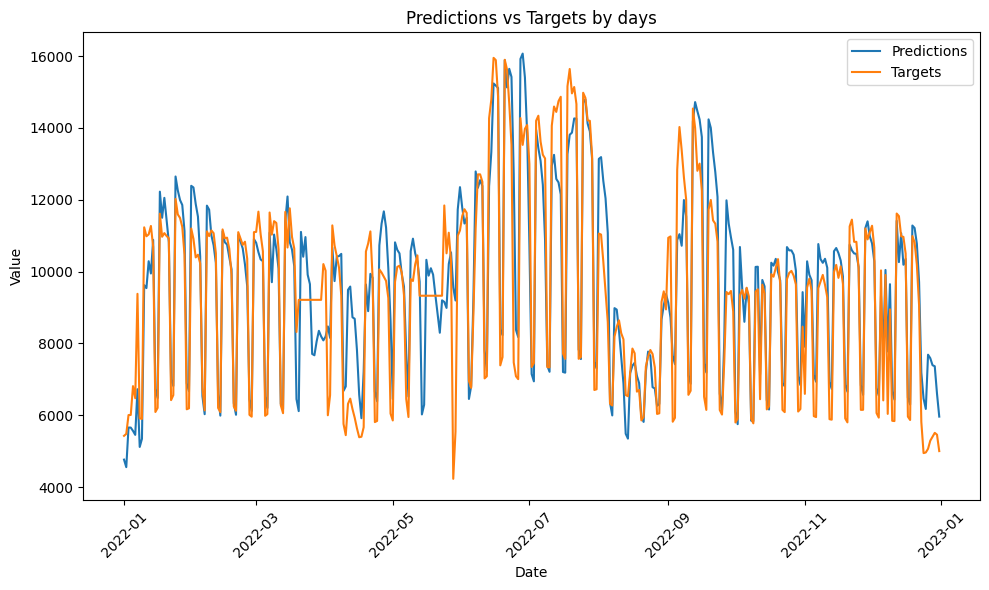

In [79]:

# Plotting the line plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(df_daily_sum.index, df_daily_sum['Predictions'], label='Predictions')  
plt.plot(df_daily_sum.index, df_daily_sum['Targets'], label='Targets')  
plt.xlabel('Date')  
plt.ylabel('Value')  
plt.title('Predictions vs Targets by days')  
plt.legend()  
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()  

We can see how months of June, July and August are the ones with higher predicted and true consumption probably because of the air conditioning. Let's erase these months as during these months we will not be able to apply the model to do online activites as there aren't lectures during these months. During June it is true that there are exams but we do not consider the possibility of doing online evaluation so we can also erase June from the distribution as it is not useful. Also we will remove September as the course starts at the middle of September and we think it is not appropiate to do online classes the first days of the course as it is interesting for students to let new people meet each other. The same happens with Januay, we will also erase it as we start lectures at the middle of the month and during the rest of the months there are exams and we do not consider doing online evaluation.

In [80]:
# Reduced dataset
# Filter the dataframe to exclude data from July and August
reduced_daily_df = df_daily_sum[~df_daily_sum.index.month.isin([1, 6, 7, 8, 9])]
reduced_hourly_df = test_pred_df[~test_pred_df.index.month.isin([1, 6, 7, 8, 9])]

In [81]:
reduced_mse_loss_descaled = mean_squared_error(reduced_hourly_df['Predictions'].values, reduced_hourly_df['Targets'].values)
print(f'Descaled MSE Loss: {np.sqrt(reduced_mse_loss_descaled):.4f}')

Descaled MSE Loss: 74.2049


In [82]:
print('Maximum predicted consumption in a day of 2022 is:', max(reduced_daily_df['Predictions']), 'kWh')
print('Maximum predicted consumption at an hour of a day of 2022 is:', max(reduced_hourly_df['Predictions']), 'kWh')
print('Minimum predicted consumption in a day of 2022 is:', min(reduced_daily_df['Predictions']), 'kWh')
print('Minimum predicted consumption at an hour of a day of 2022 is:', min(reduced_hourly_df['Predictions']), 'kWh')

Maximum predicted consumption in a day of 2022 is: 12351.1220703125 kWh
Maximum predicted consumption at an hour of a day of 2022 is: 812.5664672851562 kWh
Minimum predicted consumption in a day of 2022 is: 5750.16748046875 kWh
Minimum predicted consumption at an hour of a day of 2022 is: 216.03334045410156 kWh


Now we need to define a threshold to decide if a consumption is too high and we need to do class online or not. This threshold will be extracted from the validation data.

In [83]:
from scipy.stats import mstats

def calculate_threshold(list, percentil):
    threshold = mstats.mquantiles(list, prob=percentil)  #We use this percentil function andnot the np one because is less sensible to outliers
    return threshold[0] # The [0] is because is a value inside of a list

In [84]:
val_target_consumption = pd.DataFrame(science_bio_df[science_and_bio_target][26304:35064]) # validation target data from 2020 to 2022

# Convert the index to datetime
date_range_2 = pd.date_range(start='2020-01-01 00:00', periods=len(val_target_consumption), freq='H')

# Assign the date range as the index of the dataframe
val_target_consumption.index = date_range_2
val_target_consumption

,Total (General) [kWh] [C-Ciencies]
2020-01-01 00:00:00,201.27
2020-01-01 01:00:00,204.57
2020-01-01 02:00:00,204.00
2020-01-01 03:00:00,206.50
2020-01-01 04:00:00,200.85
...,...
2020-12-30 19:00:00,232.28
2020-12-30 20:00:00,232.00
2020-12-30 21:00:00,238.00
2020-12-30 22:00:00,230.00


In [85]:
# Let's do a groupby per days to have the conssumption per days (now is done by hours)
val_target_consumption_days = val_target_consumption.groupby(pd.Grouper(freq='D')).sum()
list_target_val = val_target_consumption_days['Total (General) [kWh] [C-Ciencies]'].tolist()

In [86]:
percentil = 0.73
threshold = calculate_threshold(list_target_val, percentil)
print("Threshold we will use for our predictions:", threshold)

Threshold we will use for our predictions: 10593.408519999999


So let's see which of our predicted days will exceed the threshold defined from our validation data

In [87]:
high_daily_consumptions_idx = []
high_daily_consumptions_index = []
high_daily_consumptions_values_pred = []
high_daily_consumptions_values_real = []
for i in range(len(reduced_daily_df)):
    pred = reduced_daily_df.iloc[i]['Predictions']
    if pred >= threshold:
        high_daily_consumptions_idx.append(i)
for index in high_daily_consumptions_idx:
    print(reduced_daily_df.iloc[index])
    high_daily_consumptions_index.append(str(reduced_daily_df.index[index].date()))
    high_daily_consumptions_values_pred.append(reduced_daily_df.iloc[index]['Predictions'])
    high_daily_consumptions_values_real.append(reduced_daily_df.iloc[index]['Targets'])


Predictions    12341.981445
Targets        10908.580078
Name: 2022-02-01 00:00:00, dtype: float32
Predictions    11882.795898
Targets        10394.139648
Name: 2022-02-02 00:00:00, dtype: float32
Predictions    11530.743164
Targets        10469.269531
Name: 2022-02-03 00:00:00, dtype: float32
Predictions    11836.430664
Targets        11118.639648
Name: 2022-02-07 00:00:00, dtype: float32
Predictions    11723.574219
Targets        10987.940430
Name: 2022-02-08 00:00:00, dtype: float32
Predictions    11006.359375
Targets        11146.280273
Name: 2022-02-09 00:00:00, dtype: float32
Predictions    10731.601562
Targets        11069.139648
Name: 2022-02-10 00:00:00, dtype: float32
Predictions    11121.935547
Targets        11173.330078
Name: 2022-02-14 00:00:00, dtype: float32
Predictions    10816.543945
Targets        10927.150391
Name: 2022-02-15 00:00:00, dtype: float32
Predictions    10753.315430
Targets        10944.290039
Name: 2022-02-16 00:00:00, dtype: float32
Predictions    11017

In [88]:
online_days_dict = {'day': high_daily_consumptions_index,
        'predictions': high_daily_consumptions_values_pred,
        'true': high_daily_consumptions_values_real}

online_days = pd.DataFrame(online_days_dict)
online_days['day'] = pd.to_datetime(online_days['day'])

In [89]:
online_days.shape

(48, 3)

In [90]:
reduced_daily_df['prediction_class'] = reduced_daily_df['Predictions'].apply(lambda x: 1 if x>threshold else 0)
reduced_daily_df['target_class'] = reduced_daily_df['Targets'].apply(lambda x: 1 if x>threshold else 0)
final_df = reduced_daily_df
final_df

C:\Users\Miguel\AppData\Local\Temp\ipykernel_12644\3199123272.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_daily_df['prediction_class'] = reduced_daily_df['Predictions'].apply(lambda x: 1 if x>threshold else 0)
C:\Users\Miguel\AppData\Local\Temp\ipykernel_12644\3199123272.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_daily_df['target_class'] = reduced_daily_df['Targets'].apply(lambda x: 1 if x>threshold else 0)


,Predictions,Targets,prediction_class,target_class
2022-02-01,12341.981445,10908.580078,1,1
2022-02-02,11882.795898,10394.139648,1,0
2022-02-03,11530.743164,10469.269531,1,0
2022-02-04,10422.448242,10227.219727,0,0
2022-02-05,6530.919922,6761.990234,0,0
...,...,...,...,...
2022-12-27,7587.180176,5290.120117,0,0
2022-12-28,7392.260742,5397.340332,0,0
2022-12-29,7362.270508,5507.720215,0,0
2022-12-30,6599.865234,5456.890137,0,0


Let's evaluate the model:

In [91]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

# Extract the true and predicted classes from the DataFrame
y_true = final_df['target_class']
y_pred = final_df['prediction_class']

# Calculate the accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate the recall
recall = recall_score(y_true, y_pred)

# Calculate the precision
precision = precision_score(y_true, y_pred)

# Calculate the F1 score
f1 = f1_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)


Accuracy: 0.839622641509434
Recall: 0.64
Precision: 0.6666666666666666
F1 Score: 0.6530612244897959


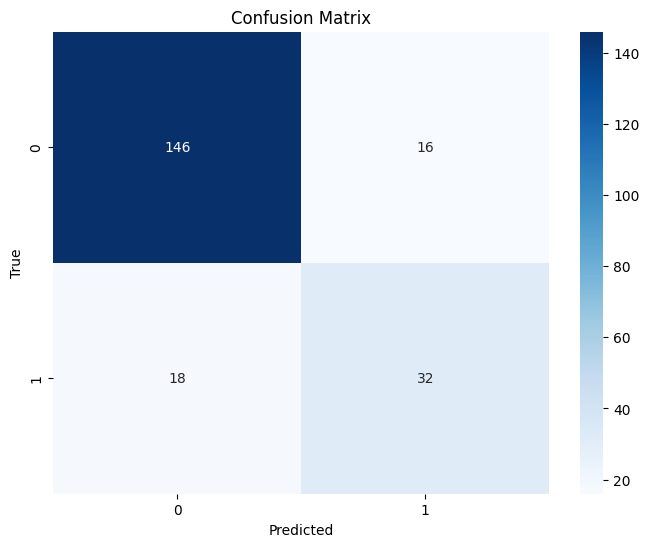

Metrics for Each Class:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       162
           1       0.67      0.64      0.65        50

    accuracy                           0.84       212
   macro avg       0.78      0.77      0.77       212
weighted avg       0.84      0.84      0.84       212



In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Extract the true and predicted classes from the DataFrame
y_true = final_df['target_class']
y_pred = final_df['prediction_class']

# Calculate the confusion matrix
confusion = confusion_matrix(y_true, y_pred)

# Get the unique class labels
classes = np.unique(np.concatenate((y_true, y_pred)))

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Calculate metrics for each class
report = classification_report(y_true, y_pred)

print("Metrics for Each Class:")
print(report)